**Load the Data**

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('/content/Scholarship_Exam_Large_Data.csv')

In [67]:
# Display the first few rows
data.head()

,StudentID,Name,Age,Gender,PracticeExam1,PracticeExam2,PracticeExam3,AttendanceRate,ParentalEducation,PreviousScholarship,ScholarshipStatus
0,1,Student_1,16.0,Male,84.0,74.0,53.0,84%,High School,No,No
1,2,Student_2,16.0,Male,64.0,88.0,NaN,91%,NaN,Yes,No
2,3,Student_3,18.0,Male,95.0,98.0,95.0,93%,NaN,No,Yes
3,4,Student_4,17.0,Male,79.0,75.0,87.0,NaN,Master's,No,No
4,5,Student_5,17.0,Female,85.0,68.0,94.0,NaN,NaN,No,Yes


In [68]:
data.shape

(1000, 11)

This shape gives insight into the structure of dataset, which includes 1000 data points and 11 features. When applying machine learning algorithms, it's important to understand the dataset size and the number of features, as this can affect model complexity, computational efficiency, and potential issues such as overfitting or data leakage.

In [69]:
data['ScholarshipStatus'].value_counts()

,count
ScholarshipStatus,
No,528
Yes,472


# **Data Inspection**

In [70]:
# Inspect the structure of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            1000 non-null   int64  
 1   Name                 1000 non-null   object 
 2   Age                  736 non-null    float64
 3   Gender               1000 non-null   object 
 4   PracticeExam1        894 non-null    float64
 5   PracticeExam2        904 non-null    float64
 6   PracticeExam3        900 non-null    float64
 7   AttendanceRate       904 non-null    object 
 8   ParentalEducation    755 non-null    object 
 9   PreviousScholarship  1000 non-null   object 
 10  ScholarshipStatus    1000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 86.1+ KB


In [71]:
# Check for missing values
data.isnull().sum()

,0
StudentID,0
Name,0
Age,264
Gender,0
PracticeExam1,106
PracticeExam2,96
PracticeExam3,100
AttendanceRate,96
ParentalEducation,245
PreviousScholarship,0


In [72]:
# Basic statistics
data.describe(include='all')

,StudentID,Name,Age,Gender,PracticeExam1,PracticeExam2,PracticeExam3,AttendanceRate,ParentalEducation,PreviousScholarship,ScholarshipStatus
count,1000.000000,1000,736.000000,1000,894.000000,904.000000,900.000000,904,755,1000,1000
unique,NaN,1000,NaN,2,NaN,NaN,NaN,26,3,2,2
top,NaN,Student_1,NaN,Female,NaN,NaN,NaN,81%,High School,Yes,No
freq,NaN,1,NaN,519,NaN,NaN,NaN,44,265,508,528
mean,500.500000,NaN,17.009511,NaN,75.421700,75.403761,75.291111,NaN,NaN,NaN,NaN
std,288.819436,NaN,0.818937,NaN,14.948737,14.505417,14.895921,NaN,NaN,NaN,NaN
min,1.000000,NaN,16.000000,NaN,50.000000,50.000000,50.000000,NaN,NaN,NaN,NaN
25%,250.750000,NaN,16.000000,NaN,62.000000,63.000000,62.000000,NaN,NaN,NaN,NaN
50%,500.500000,NaN,17.000000,NaN,76.000000,76.000000,76.000000,NaN,NaN,NaN,NaN
75%,750.250000,NaN,18.000000,NaN,89.000000,88.000000,88.000000,NaN,NaN,NaN,NaN


In [73]:
# Convert AttendanceRate to numeric percentages
data["AttendanceRate"] = data["AttendanceRate"].str.rstrip('%').astype("float")

# Fill missing values with appropriate strategies
data["Age"].fillna(data["Age"].mode()[0], inplace=True)  # Fill Age with mode
data["PracticeExam1"].fillna(data["PracticeExam1"].mean(), inplace=True)  # Fill scores with mean
data["PracticeExam2"].fillna(data["PracticeExam2"].mean(), inplace=True)
data["PracticeExam3"].fillna(data["PracticeExam3"].mean(), inplace=True)
data["AttendanceRate"].fillna(data["AttendanceRate"].mean(), inplace=True)
data["ParentalEducation"].fillna("Unknown", inplace=True)  # Fill with 'Unknown'

# Verify missing values are handled
data.isnull().sum()


<ipython-input-73-9daf347e8010>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mode()[0], inplace=True)  # Fill Age with mode
<ipython-input-73-9daf347e8010>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

,0
StudentID,0
Name,0
Age,0
Gender,0
PracticeExam1,0
PracticeExam2,0
PracticeExam3,0
AttendanceRate,0
ParentalEducation,0
PreviousScholarship,0


# **Feature Engineering**

In [74]:
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [75]:
numerical_features

['StudentID',
 'Age',
 'PracticeExam1',
 'PracticeExam2',
 'PracticeExam3',
 'AttendanceRate']

In [76]:
categorical_features

['Name',
 'Gender',
 'ParentalEducation',
 'PreviousScholarship',
 'ScholarshipStatus']

In [77]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical feature
for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

# Check the updated data
data.head()


,StudentID,Name,Age,Gender,PracticeExam1,PracticeExam2,PracticeExam3,AttendanceRate,ParentalEducation,PreviousScholarship,ScholarshipStatus
0,1,0,16.0,1,84.0,74.0,53.000000,84.000000,1,0,0
1,2,112,16.0,1,64.0,88.0,75.291111,91.000000,3,1,0
2,3,223,18.0,1,95.0,98.0,95.000000,93.000000,3,0,1
3,4,334,17.0,1,79.0,75.0,87.000000,87.465708,2,0,0
4,5,445,17.0,0,85.0,68.0,94.000000,87.465708,3,0,1


**Visualize Target Distribution**

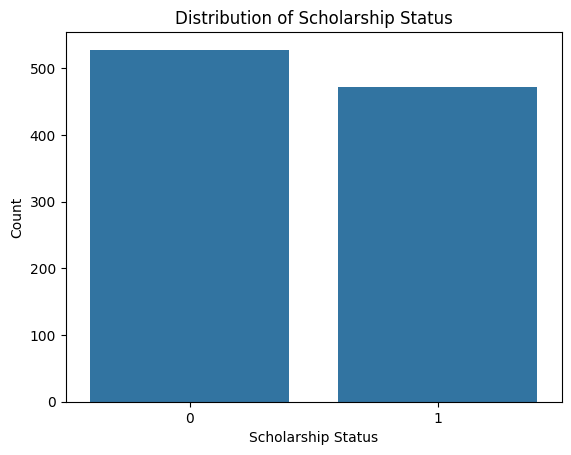

In [78]:
# Countplot for Scholarship Status
sns.countplot(x="ScholarshipStatus", data=data)
plt.title("Distribution of Scholarship Status")
plt.xlabel("Scholarship Status")
plt.ylabel("Count")
plt.show()


data is balanced.

## **Visualize Numerical Features**

**Histogram for Numerical Features**

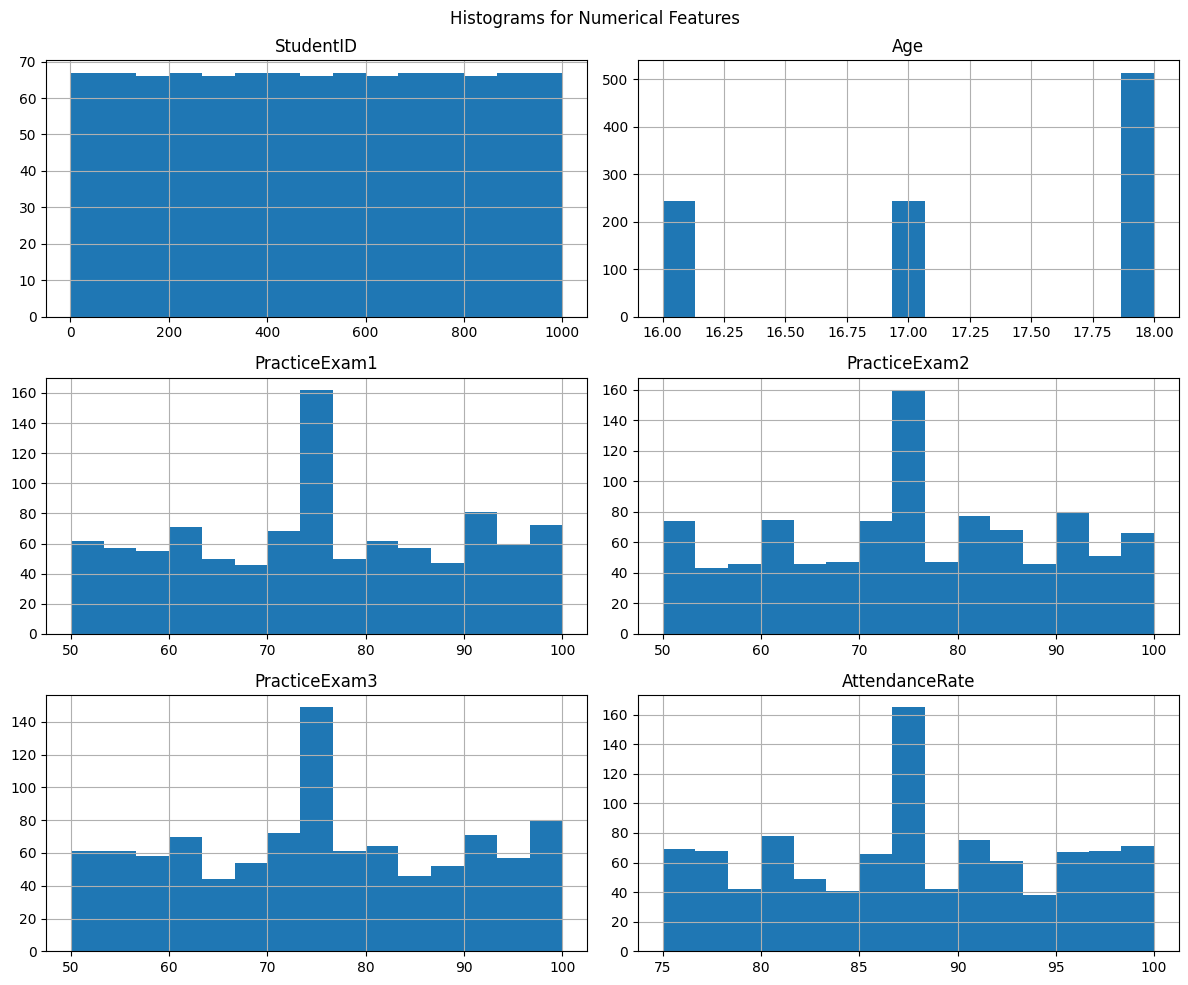

In [79]:
# Plot histograms for all numerical features
data[numerical_features].hist(figsize=(12, 10), bins=15)
plt.suptitle("Histograms for Numerical Features")
plt.tight_layout()
plt.show()


# **Correlation Heatmap**

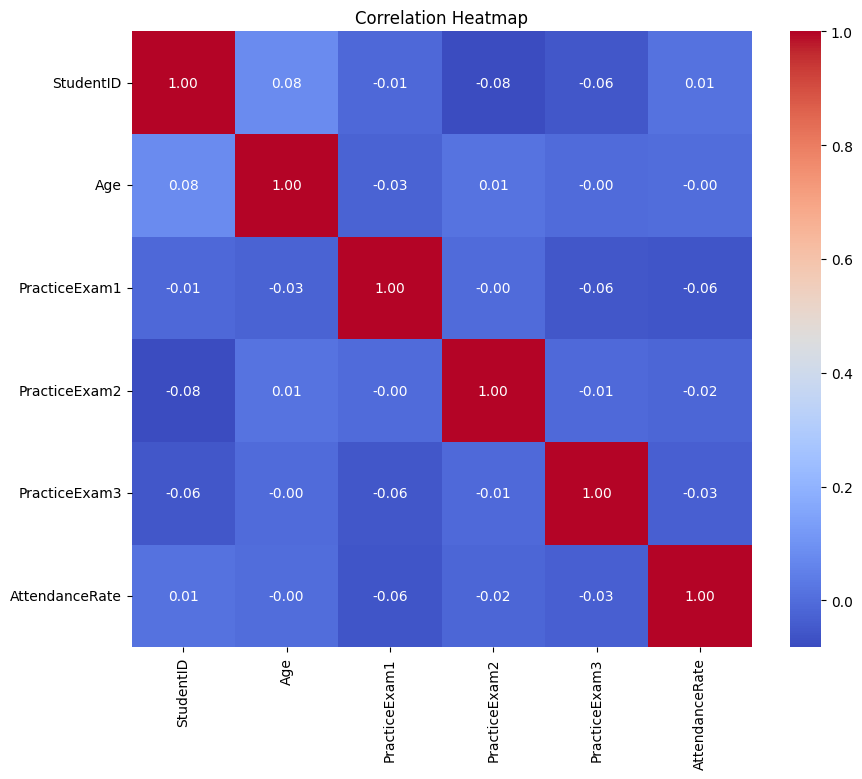

In [80]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


No features are correlated to each other.


## **Visualize Categorical Features**

**Bar Plot for Categorical Features**

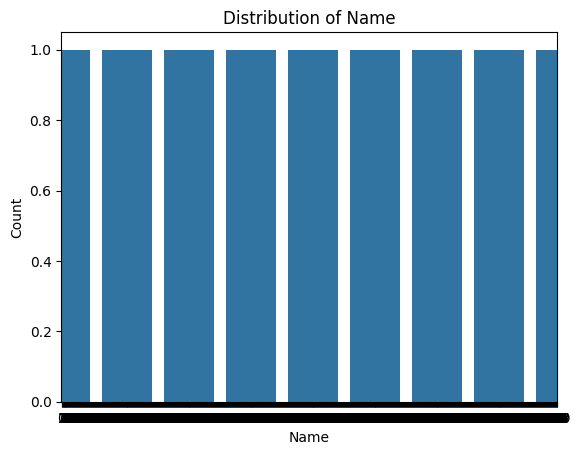

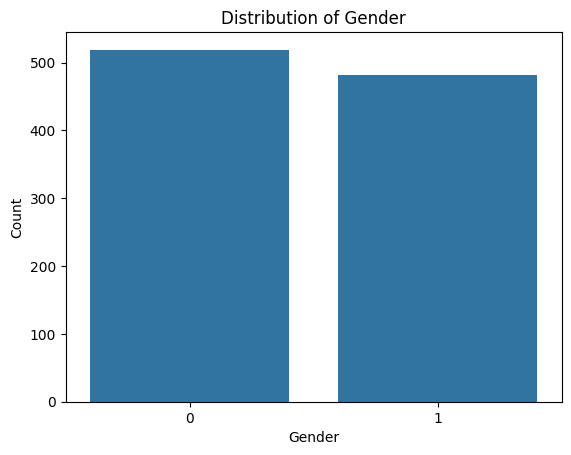

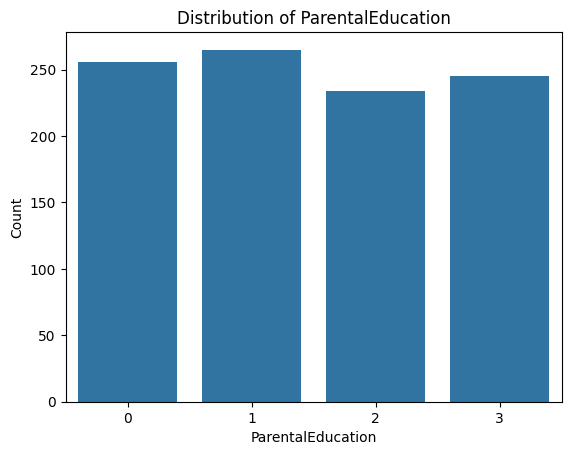

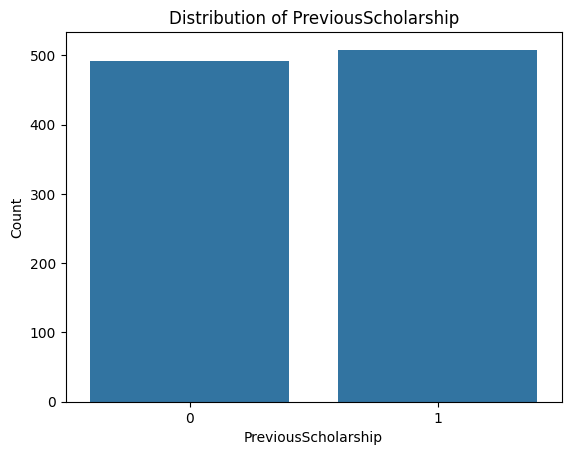

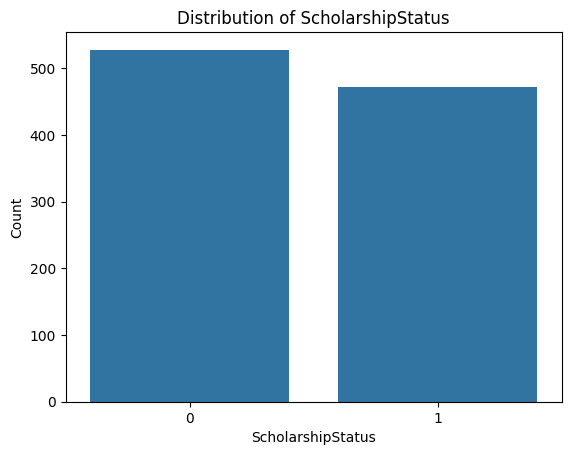

In [81]:
# Bar plots for categorical features
for col in categorical_features:
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


**Pairplot for Feature Relationships**

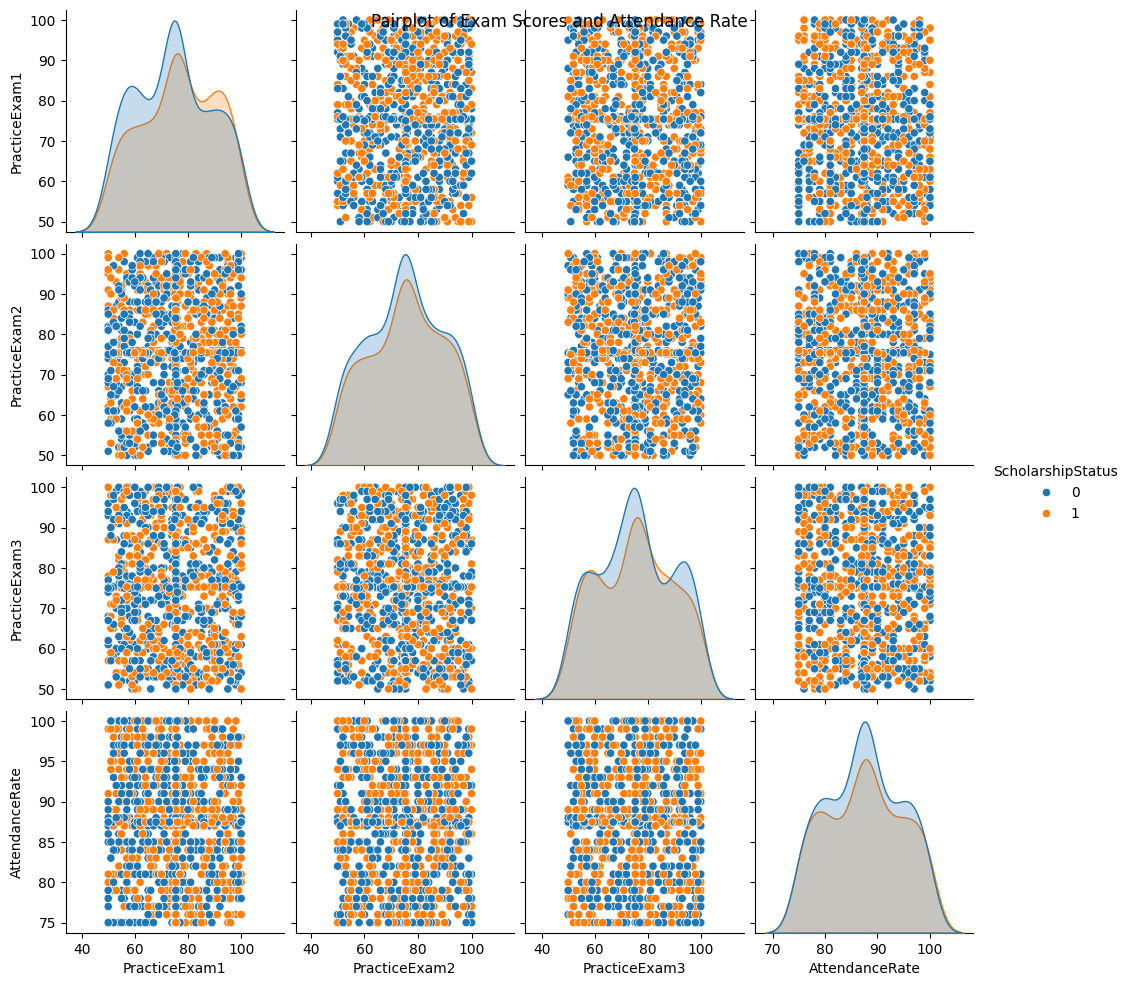

In [82]:
# Pairplot for selected features
sns.pairplot(data, vars=["PracticeExam1", "PracticeExam2", "PracticeExam3", "AttendanceRate"], hue="ScholarshipStatus")
plt.suptitle("Pairplot of Exam Scores and Attendance Rate")
plt.show()


## **Analysis of the Pairplot**

### PracticeExam1, PracticeExam2, and PracticeExam3 Distributions
The distribution of scores across the three practice exams shows a slight distinction between the two groups (ScholarshipStatus = 0 and 1). Students who secured scholarships tend to perform slightly better on average compared to those who did not.

### Attendance Rate Correlation
The AttendanceRate seems to have a visible impact on scholarship outcomes. Students with higher attendance rates (clustered above 85%) are more likely to be awarded scholarships.

### Relationship Between Exam Scores
There is no significant correlation between the scores of different practice exams. This indicates that students perform independently across different exams, likely due to varying levels of difficulty or preparation.

### ScholarshipStatus Visualization
The separation between ScholarshipStatus = 1 and 0 is more pronounced in features like AttendanceRate and PracticeExam3, suggesting these variables might be more predictive of success.


**Boxplots for Numerical Features by Target**

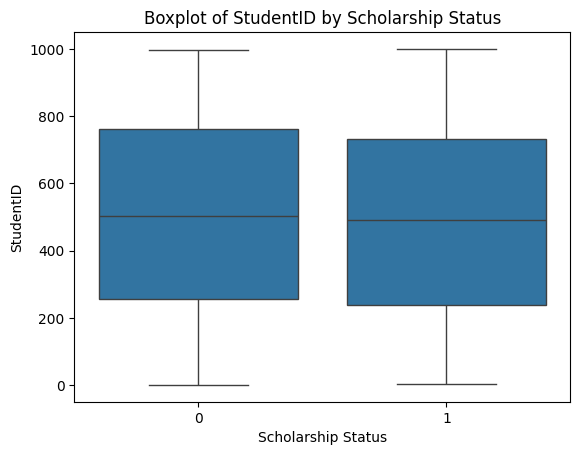

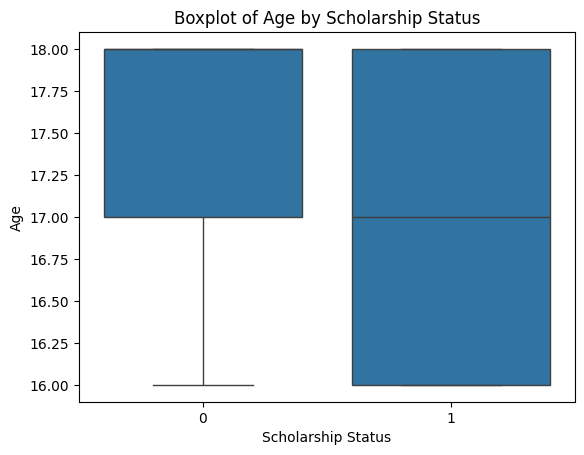

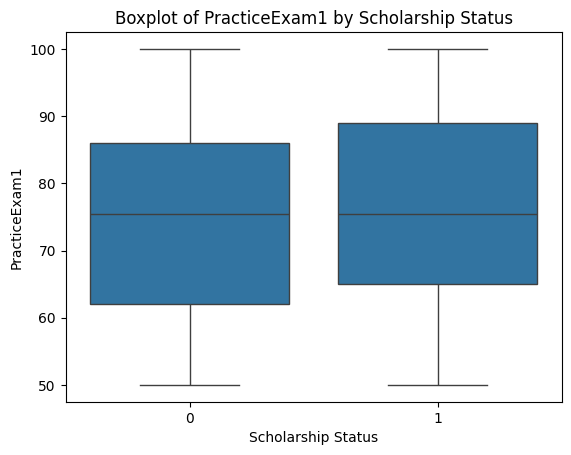

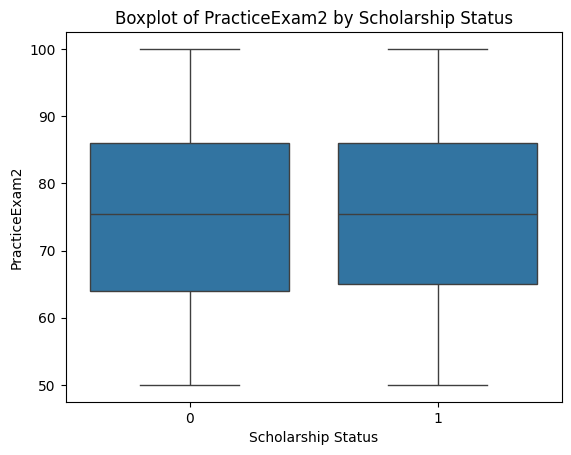

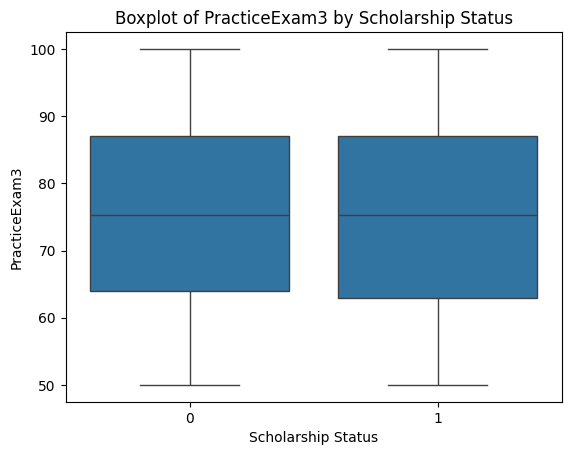

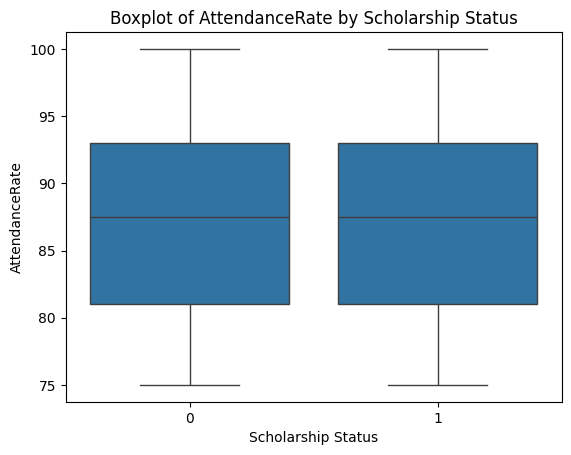

In [83]:
# Boxplots for numerical features grouped by ScholarshipStatus
for col in numerical_features:
    if col != "ScholarshipStatus":
        sns.boxplot(x="ScholarshipStatus", y=col, data=data)
        plt.title(f"Boxplot of {col} by Scholarship Status")
        plt.xlabel("Scholarship Status")
        plt.ylabel(col)
        plt.show()


## **Attendance Rate vs. Average Score**

In [84]:
# Calculate the average score from the practice exams
data["AverageScore"] = data[["PracticeExam1", "PracticeExam2", "PracticeExam3"]].mean(axis=1)


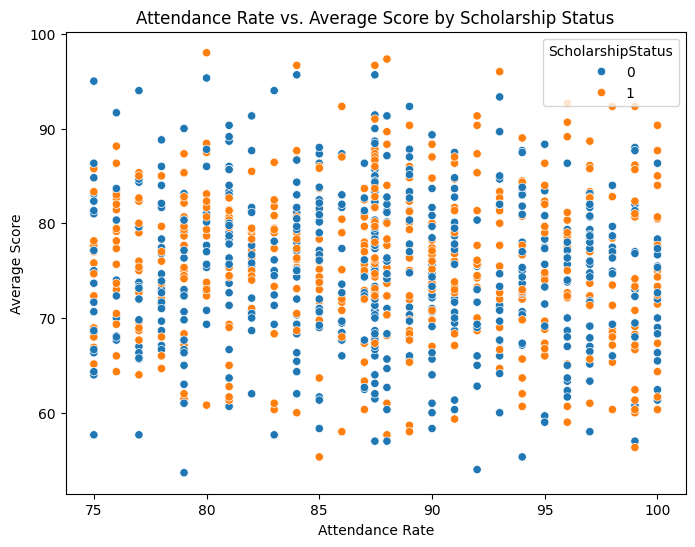

In [85]:
# Scatter plot for Attendance Rate vs Average Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x="AttendanceRate", y="AverageScore", hue="ScholarshipStatus", data=data)
plt.title("Attendance Rate vs. Average Score by Scholarship Status")
plt.xlabel("Attendance Rate")
plt.ylabel("Average Score")
plt.show()


not highly correlated

## **Feature Importance Plot**

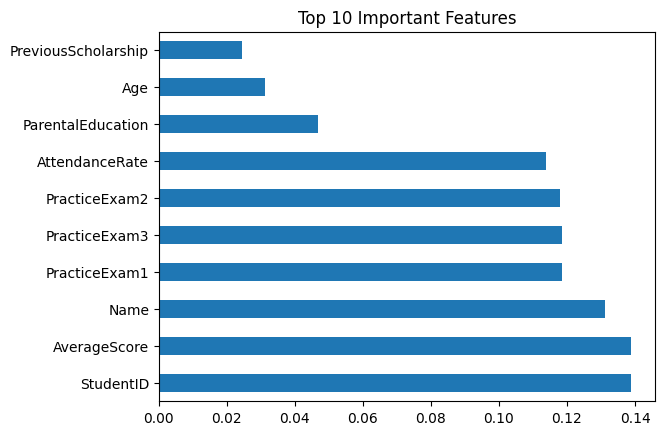

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest for feature importance
X = data.drop(columns=["ScholarshipStatus"])
y = data["ScholarshipStatus"]
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh", title="Top 10 Important Features")
plt.show()


In [112]:
# Imputing missing values (for numerical columns)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


**Feature Scaling**

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# **Data Splitting**

In [105]:
X = data.drop('ScholarshipStatus', axis=1)  # Features (input variables)
y = data['ScholarshipStatus']  # Target variable (Scholarship status)


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Selection and Training**

In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)


In [108]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Model Evaluation**

In [109]:
y_pred = model.predict(X_test)


In [110]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4400


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.44
Precision: 0.3695652173913043
Recall: 0.38636363636363635
F1 Score: 0.37777777777777777
Confusion Matrix:
 [[54 58]
 [54 34]]


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define a function to train and evaluate models
def train_and_evaluate_models(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Support Vector Machine': SVC(),
        'K-Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
    }

    # List to store model names and their accuracy scores
    results = []

    # Train each model and evaluate its accuracy
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Append the results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy
        })

    # Convert the results into a pandas DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Example usage (assuming your dataset is loaded in `data` and target column is `ScholarshipStatus`)
# X = data.drop('ScholarshipStatus', axis=1)
# y = data['ScholarshipStatus']

# Call the function to train models and get results
# model_results = train_and_evaluate_models(X, y)
# print(model_results)


In [123]:
# Get model evaluation results
model_results = train_and_evaluate_models(X, y)
print(model_results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy
0           Random Forest     0.440
1     Logistic Regression     0.560
2  Support Vector Machine     0.530
3             K-Neighbors     0.495
4           Decision Tree     0.480
5                 XGBoost     0.495


# **Hyperparameter Tuning**

In [129]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [132]:
# Use the best parameters obtained from GridSearchCV or RandomizedSearchCV
best_rf = RandomForestClassifier(max_depth=None, min_samples_split=10, n_estimators=50, random_state=42)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.5100


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your dataset loaded in 'X' (features) and 'y' (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],            # Regularization strength
    'penalty': ['l1', 'l2'],                         # Type of regularization
    'solver': ['liblinear', 'saga']                  # Solvers compatible with l1/l2 regularization
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.52125
Test Accuracy: 0.5600


**Cross-Validation:**

In [139]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.5125  0.5     0.5875  0.475   0.58125]
Average Cross-validation score: 0.5312


# **To improve the model and avoid overfitting or achieve better generalization**

**Model Stacking**

In [140]:
from sklearn.ensemble import StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [141]:
model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)
model.fit(X_train, y_train)

# Evaluate again
test_score = model.score(X_test, y_test)
print(f"Test score: {test_score}")



Test score: 0.52


**Hyperparameter Tuning:**

# **Model Deployment**

In [142]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, "scholarship_prediction_model.pkl")

# Load the model for testing
loaded_model = joblib.load("scholarship_prediction_model.pkl")
test_predictions = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, test_predictions))


Loaded Model Accuracy: 0.985
